In [ ]:
import pandas as pd
Data = pd.read_csv('/content/spotify_millsongdata.csv')
Data.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
Data.shape

(57650, 4)

In [ ]:
Data.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [ ]:
Data = Data.sample(10000).drop('link', axis=1).reset_index(drop=True)

In [ ]:
Data.head(5)

,artist,song,text
0,Death,Open Casket,Approach the image filled with fear \r\nAs th...
1,Thin Lizzy,Spirit Slips Away,When the spirit slips away \r\nThere's nothin...
2,Alice Cooper,Give The Radio Back,"Hey teacher, whatcha trying to do? \r\nI'm ge..."
3,Leo Sayer,Who Will The Next Fool Be,"Falling, oh, oh, I'm falling \r\nFalling so d..."
4,Van Halen,You're No Good,"Well, I'm feelin' better now that we're throug..."


In [ ]:
Data.shape

(10000, 3)

In [ ]:
Data['text'] = Data['text'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex = True)

In [ ]:
Data['text']

0       approach the image filled with fear  \r as the...
1       when the spirit slips away  \r there's nothing...
2       hey teacher, whatcha trying to do?  \r i'm get...
3       falling, oh, oh, i'm falling  \r falling so de...
4       well, i'm feelin' better now that we're throug...
                              ...                        
9995    am i waking to this magic  \r am i seeing all ...
9996    i slipped into my jeans  \r lookin' hard and f...
9997    i'm in the mood for love  \r simply because yo...
9998    cold in this room now  \r 'cause you left me  ...
9999    who'll take the only hearts they got  \r and t...
Name: text, Length: 10000, dtype: object

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenization(txt):
    tokens = nltk.word_tokenize(txt)
    stemming = [stemmer.stem(w) for w in tokens]
    return " ".join(stemming)

In [ ]:
Data['text'] = Data['text'].apply(lambda x: tokenization(x))

In [ ]:
Data['text']

0       approach the imag fill with fear as the imag g...
1       when the spirit slip away there 's noth you ca...
2       hey teacher , whatcha tri to do ? i 'm gettin ...
3       fall , oh , oh , i 'm fall fall so deep in lov...
4       well , i 'm feelin ' better now that we 're th...
                              ...                        
9995    am i wake to thi magic am i see all is human h...
9996    i slip into my jean lookin ' hard and feelin '...
9997    i 'm in the mood for love simpli becaus you 'r...
9998    cold in thi room now 'caus you left me here by...
9999    who 'll take the onli heart they got and throw...
Name: text, Length: 10000, dtype: object

In [ ]:
Data['song']

0                     Open Casket
1               Spirit Slips Away
2             Give The Radio Back
3       Who Will The Next Fool Be
4                  You're No Good
                  ...            
9995                 I Am Waiting
9996                   Luney Tune
9997     I'm In The Mood For Love
9998                  Breaking Up
9999                 Lover's Will
Name: song, Length: 10000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tfidvector = TfidfVectorizer(analyzer='word',stop_words='english')

In [ ]:
matrix = tfidvector.fit_transform(Data['text'])

In [ ]:
similarity = cosine_similarity(matrix)

In [ ]:
similarity[1]

array([0.02274151, 1.        , 0.00540811, ..., 0.        , 0.0150727 ,
       0.01177359])

In [ ]:
def recommendation(song_df):
    idx = Data[Data['song'] == song_df].index[0]
    distances = sorted(list(enumerate(similarity[idx])),reverse=True,key=lambda x:x[1])

    songs = []
    for m_id in distances[1:21]:
        songs.append(Data.iloc[m_id[0]].song)

    return songs

In [ ]:
recommendation('Bang-A-Boomerang')

['Boom!',
 "Don't Hold It Against Me",
 'Time Is Free',
 'Boom Boom',
 'Power',
 'We Told You So',
 'Bedroom Boom',
 'Butterflies',
 'Beach Shack',
 'Bang Bang',
 'Bang Bang',
 'Rocks',
 'Divine',
 'From Me To You',
 "Don't Bang The Drum",
 'Bang A Drum',
 'Blind',
 'Here We Go Again',
 'Billy The Kid Next Door',
 'Falco Rides Again']

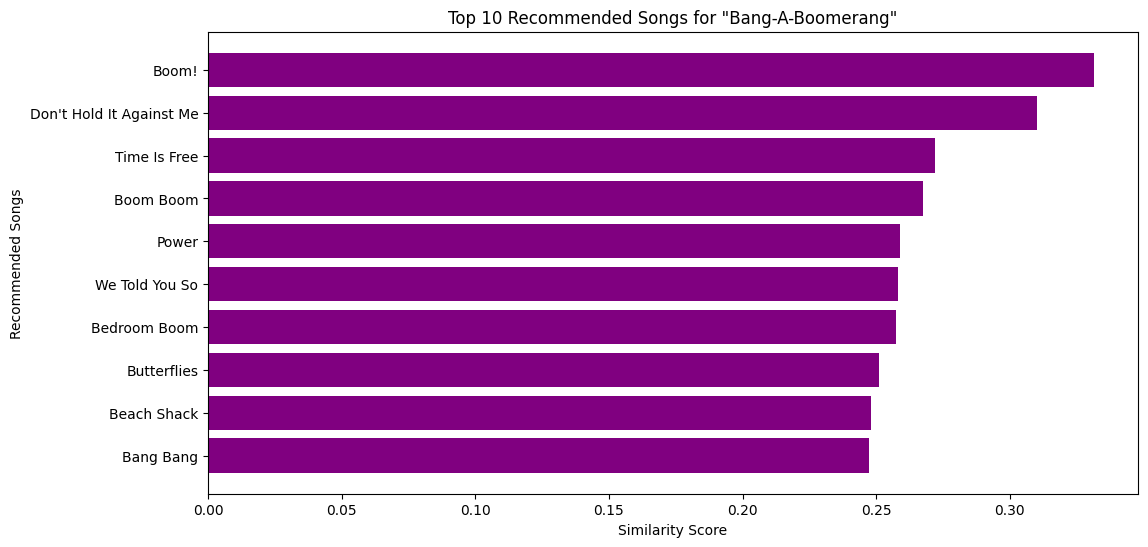

In [ ]:
import matplotlib.pyplot as plt
def plot_recommendations(song_name):
    idx = Data[Data['song'] == song_name].index[0]
    distances = sorted(list(enumerate(similarity[idx])), reverse=True, key=lambda x: x[1])[1:11]

    recommended_songs = [Data.iloc[m_id[0]].song for m_id in distances]
    similarity_scores = [m_id[1] for m_id in distances]

    plt.figure(figsize=(12, 6))
    plt.barh(recommended_songs, similarity_scores, color='purple')
    plt.xlabel('Similarity Score')
    plt.ylabel('Recommended Songs')
    plt.title(f'Top 10 Recommended Songs for "{song_name}"')
    plt.gca().invert_yaxis()
    plt.show()

# Plot recommendations for a sample song
plot_recommendations('Bang-A-Boomerang')

In [ ]:
import pickle
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(Data,open('Data.pkl','wb'))